# **Load Libraries And Data**

In [1]:
'''import my libraries '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
'''load training dataset'''
exercise = pd.read_csv('../input/fitness-data/exercise.csv') 
Calories = pd.read_csv('../input/fitness-data/calories.csv')

In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
Calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


**Aggregate data into a single file for easy handling in analysis and cleaning**

In [5]:
calories = Calories.drop(['User_ID'],axis =1)
df = pd.concat([exercise,calories],axis =1)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


**Convert cat into nums**

In [6]:
df['Gender'] = df['Gender'].map({'female':0, 'male':1})

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# **EDA and Visualization**

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

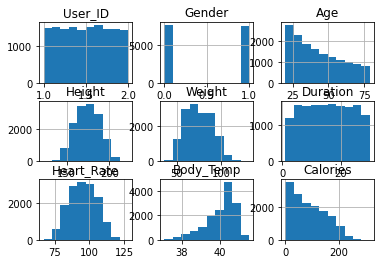

In [7]:
df.hist()

**Checking missing values**

In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**there is no missing values**

<AxesSubplot:>

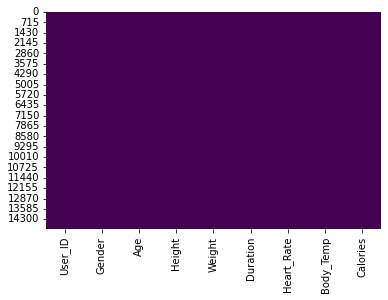

In [9]:
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

In [10]:
df.describe()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<AxesSubplot:xlabel='Calories', ylabel='Density'>

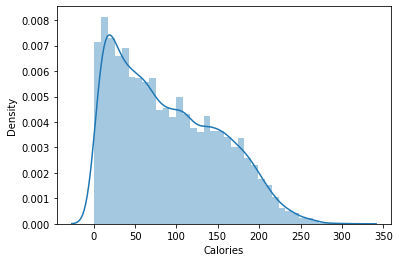

In [11]:
sns.distplot(df['Calories'])

**The Relation between type and burn**

<AxesSubplot:xlabel='Gender', ylabel='Calories'>

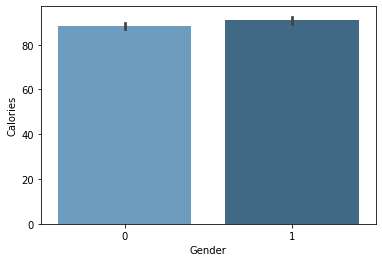

In [12]:
#sns.countplot(x=df['Calories'],hue=df['Gender'],data=df)
sns.barplot(x=df['Gender'], y=df['Calories'], data=df,
                 palette="Blues_d")

**The Relation between age and burn**

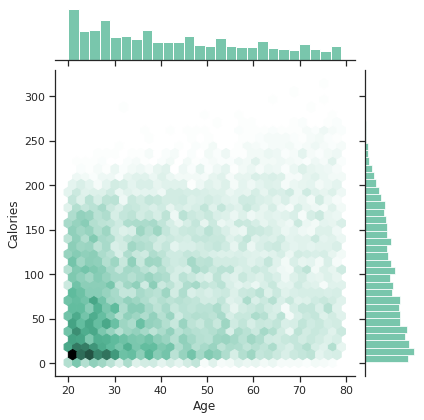

In [13]:
sns.set_theme(style="ticks")
sns.jointplot(x=df['Age'], y=df['Calories'], kind="hex", color="#4CB391")

**Correlation between features**

<AxesSubplot:>

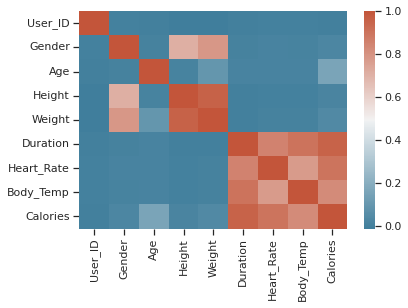

In [14]:
corr_matrix = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr_matrix, annot=False ,cmap=cmap)



In [15]:
df.corr()['Calories'].abs()

User_ID       0.001661
Gender        0.022357
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Calories      1.000000
Name: Calories, dtype: float64

**largest 4 correlation with y**

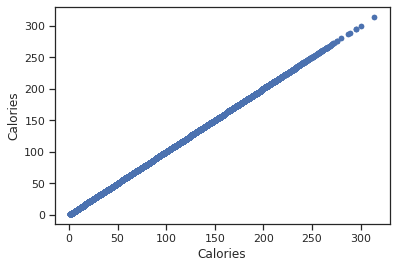

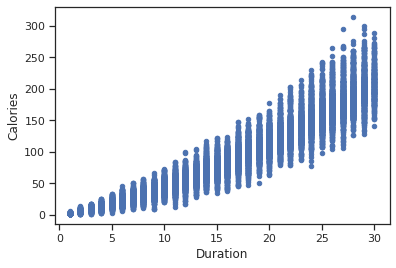

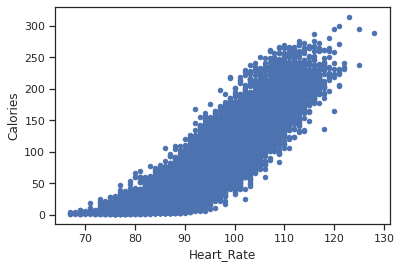

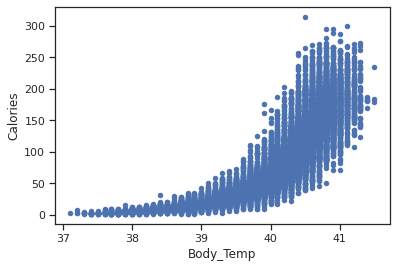

In [16]:
C = corr_matrix.nlargest(4, 'Calories')['Calories'].index
for i in C : 
    var = i
    data = pd.concat([df['Calories'], df[var]], axis=1)
    data.plot.scatter(x=var, y='Calories')

**smallest 4 correlation with y**

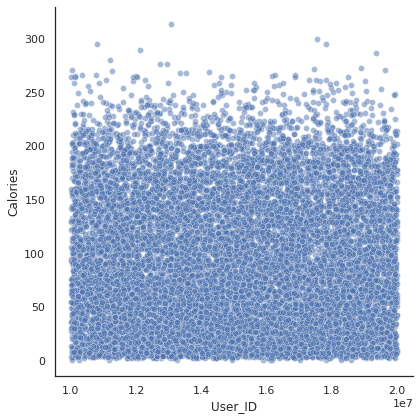

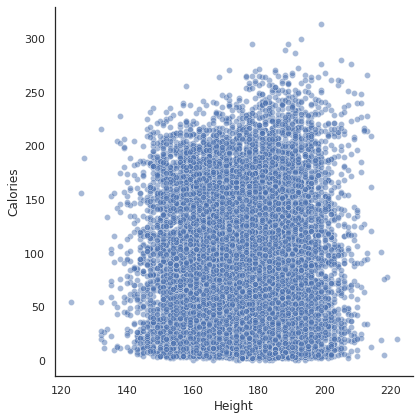

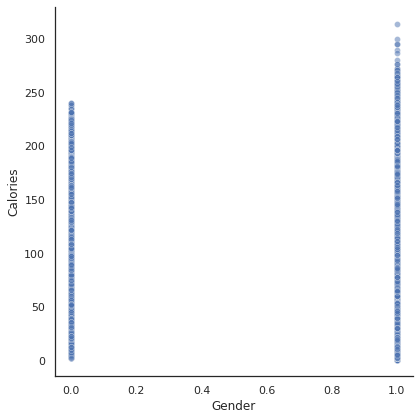

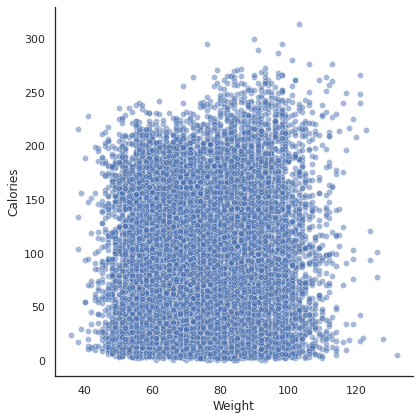

In [17]:
N = corr_matrix.nsmallest(4,'Calories')['Calories'].index
for i in N :    
    var = i
    sns.set_theme(style="white")
    sns.relplot(x=var, y="Calories",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)

**X ,y Split**

In [18]:
train =  X = df.iloc[:,:-1]
y = df['Calories']

# **Feature Scaling**

In [19]:
scl = MinMaxScaler(feature_range = (0, 1))
X = scl.fit_transform(X)
X

array([[0.47329196, 1.        , 0.81355932, ..., 0.96551724, 0.62295082,
        0.84090909],
       [0.4861274 , 0.        , 0.        , ..., 0.44827586, 0.44262295,
        0.72727273],
       [0.11788822, 1.        , 0.83050847, ..., 0.13793103, 0.3442623 ,
        0.36363636],
       ...,
       [0.72711284, 0.        , 0.38983051, ..., 0.51724138, 0.37704918,
        0.68181818],
       [0.86431848, 1.        , 0.98305085, ..., 0.03448276, 0.27868852,
        0.27272727],
       [0.17506317, 1.        , 0.72881356, ..., 0.5862069 , 0.40983607,
        0.77272727]])

# **Train & Test Split**

In [20]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y , test_size = 0.3, random_state = 4)

# **Machine Learning Model**

In [21]:
g = GradientBoostingRegressor(n_estimators = 150, learning_rate = 1.5, max_depth = 3)

**Gradient Boosting Classifier**

In [22]:
g = g.fit(X_train,y_train)
score = g.score(X_train,y_train)
percentage = "{:.0%}".format(score)
y_tpred = g.predict(X_test)

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_tpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_tpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_tpred))
print('Acc_Score:',percentage)

MAE: 3.5306494324980724
MSE: 25.262369882856827
RMSE: 5.026168509198317
VarScore: 0.9935963743801297
Acc_Score: 100%


# **Analyze and display the output**

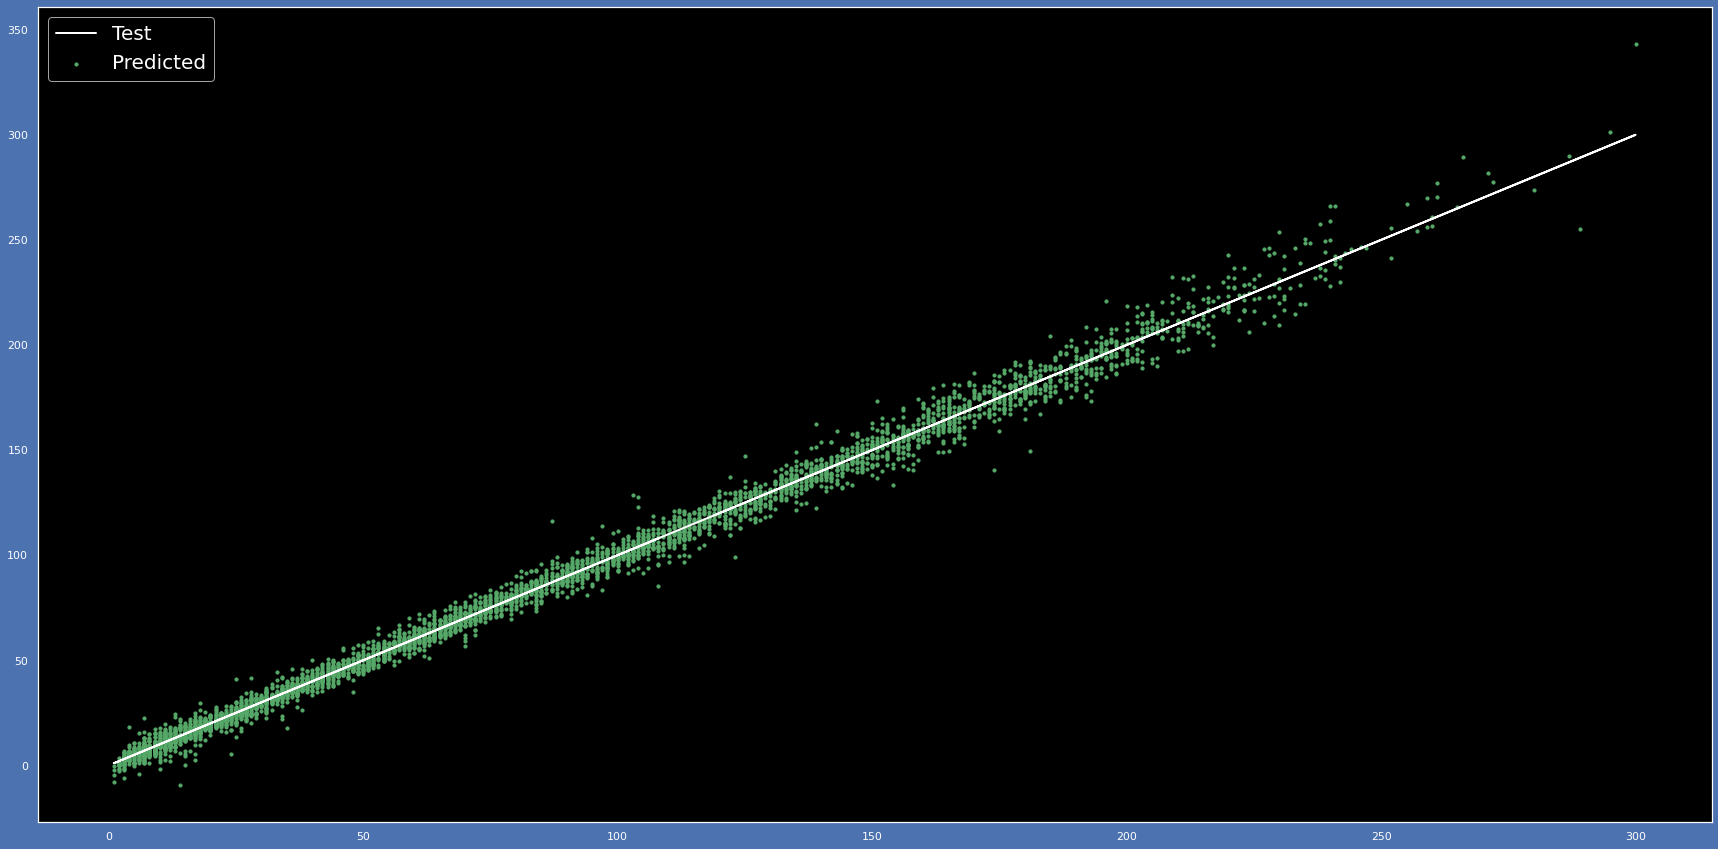

In [24]:
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(30,15),facecolor='b',edgecolor='g')
plt.scatter(y_test,y_tpred ,s=10,c='g',label='Predicted') 
plt.plot(y_test,y_test,'white' ,label='Test' ,linewidth=2.0)
plt.legend(fontsize=20)
plt.show()

# **Submission**

In [25]:
y_pred = g.predict(X)
Submission = pd.DataFrame({ 'User_ID': Calories['User_ID'],
                            'Calories': y_pred })
Submission.to_csv("Submission.csv", index=False)
Submission = Submission.iloc[ :401 ,:]

In [26]:
Submission.rename(columns={'User_ID': 'id'}, inplace=True)

In [27]:
Submission.head()

,id,Calories
0,14733363,216.736598
1,14861698,66.064117
2,11179863,24.985995
3,16180408,72.324749
4,17771927,39.058376
